<a href="https://www.kaggle.com/code/arnabmukherjee853/time-series-forecasting-fbprophet?scriptVersionId=195934367" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/energy-comsumption/pjm_hourly_est.csv


# Importing Data

In [2]:
df=pd.read_csv('/kaggle/input/energy-comsumption/pjm_hourly_est.csv')
df

,Datetime,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
0,1998-12-31 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29309.0
1,1998-12-31 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28236.0
2,1998-12-31 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27692.0
3,1998-12-31 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27596.0
4,1998-12-31 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27888.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178257,2018-01-01 20:00:00,21089.0,13858.0,2732.0,4426.0,18418.0,1962.0,2866.0,9378.0,NaN,44284.0,8401.0,NaN
178258,2018-01-01 21:00:00,20999.0,13758.0,2724.0,4419.0,18567.0,1940.0,2846.0,9255.0,NaN,43751.0,8373.0,NaN
178259,2018-01-01 22:00:00,20820.0,13627.0,2664.0,4355.0,18307.0,1891.0,2883.0,9044.0,NaN,42402.0,8238.0,NaN
178260,2018-01-01 23:00:00,20415.0,13336.0,2614.0,4224.0,17814.0,1820.0,2880.0,8676.0,NaN,40164.0,7958.0,NaN


In [3]:
df.index

RangeIndex(start=0, stop=178262, step=1)

In [4]:
df=df.set_index('Datetime')
df.index=pd.to_datetime(df.index)
df

,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
Datetime,,,,,,,,,,,,
1998-12-31 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29309.0
1998-12-31 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28236.0
1998-12-31 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27692.0
1998-12-31 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27596.0
1998-12-31 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27888.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-01 20:00:00,21089.0,13858.0,2732.0,4426.0,18418.0,1962.0,2866.0,9378.0,NaN,44284.0,8401.0,NaN
2018-01-01 21:00:00,20999.0,13758.0,2724.0,4419.0,18567.0,1940.0,2846.0,9255.0,NaN,43751.0,8373.0,NaN
2018-01-01 22:00:00,20820.0,13627.0,2664.0,4355.0,18307.0,1891.0,2883.0,9044.0,NaN,42402.0,8238.0,NaN


# Preprocessing And Visualization

In [5]:
df.isna().sum()

AEP          56989
COMED       111765
DAYTON       56987
DEOK        120523
DOM          62073
DUQ          59194
EKPC        132928
FE          115388
NI          119812
PJME         32896
PJMW         35056
PJM_Load    145366
dtype: int64

In [6]:
df.tail(5)

,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
Datetime,,,,,,,,,,,,
2018-01-01 20:00:00,21089.0,13858.0,2732.0,4426.0,18418.0,1962.0,2866.0,9378.0,NaN,44284.0,8401.0,NaN
2018-01-01 21:00:00,20999.0,13758.0,2724.0,4419.0,18567.0,1940.0,2846.0,9255.0,NaN,43751.0,8373.0,NaN
2018-01-01 22:00:00,20820.0,13627.0,2664.0,4355.0,18307.0,1891.0,2883.0,9044.0,NaN,42402.0,8238.0,NaN
2018-01-01 23:00:00,20415.0,13336.0,2614.0,4224.0,17814.0,1820.0,2880.0,8676.0,NaN,40164.0,7958.0,NaN
2018-01-02 00:00:00,19993.0,12816.0,2552.0,4100.0,17428.0,1721.0,2846.0,8393.0,NaN,38608.0,7691.0,NaN


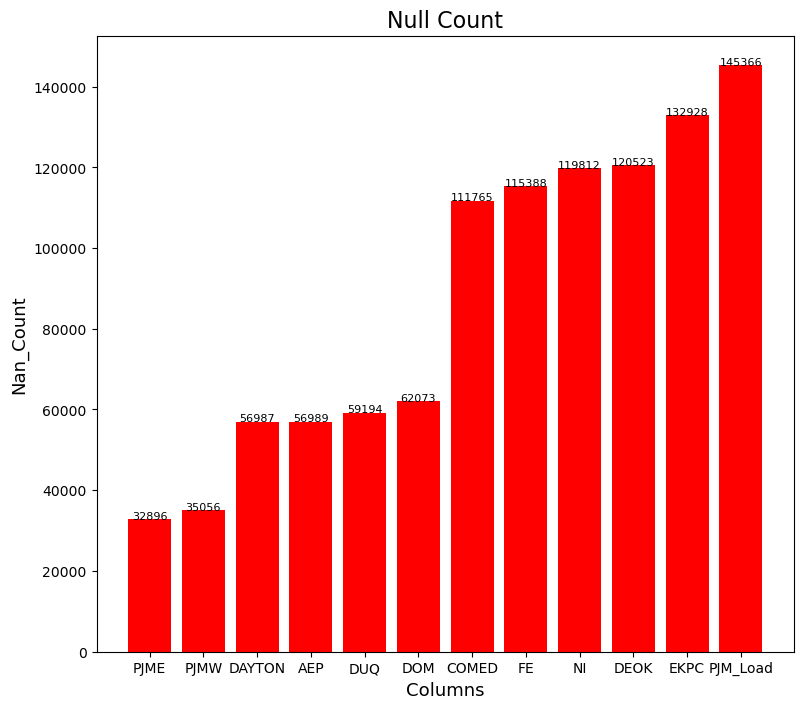

In [7]:
Nan_c = df.isna().sum().sort_values()
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(9,8))
plt.bar(Nan_c.index,Nan_c.values,color='red')
ax.set_xlabel('Columns',fontsize=13)
ax.set_ylabel('Nan_Count',fontsize=13)
ax.set_title('Null Count',fontsize=16)
for i,v in enumerate(Nan_c.values):
    plt.text(i,v+0.10,str(v),ha='center',fontsize=8)

Text(0.5, 1.0, 'Value Count Visualization')

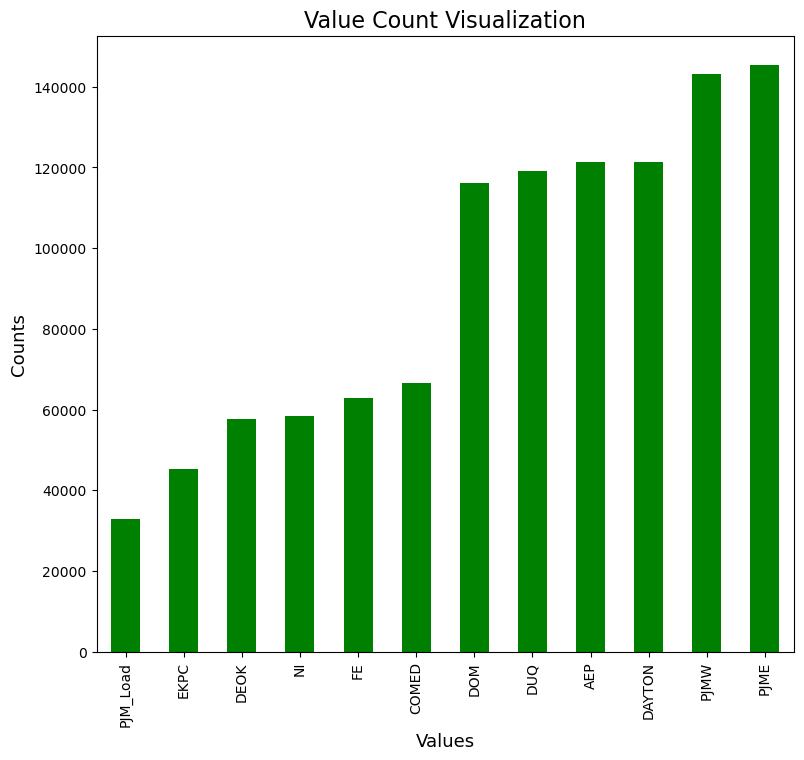

In [8]:
counts=df.count().sort_values()
fig,Ax=plt.subplots(figsize=(9,8))
counts.plot.bar(color='green')
Ax.set_xlabel('Values',fontsize=13)
Ax.set_ylabel('Counts',fontsize=13)
Ax.set_title('Value Count Visualization',fontsize=16)

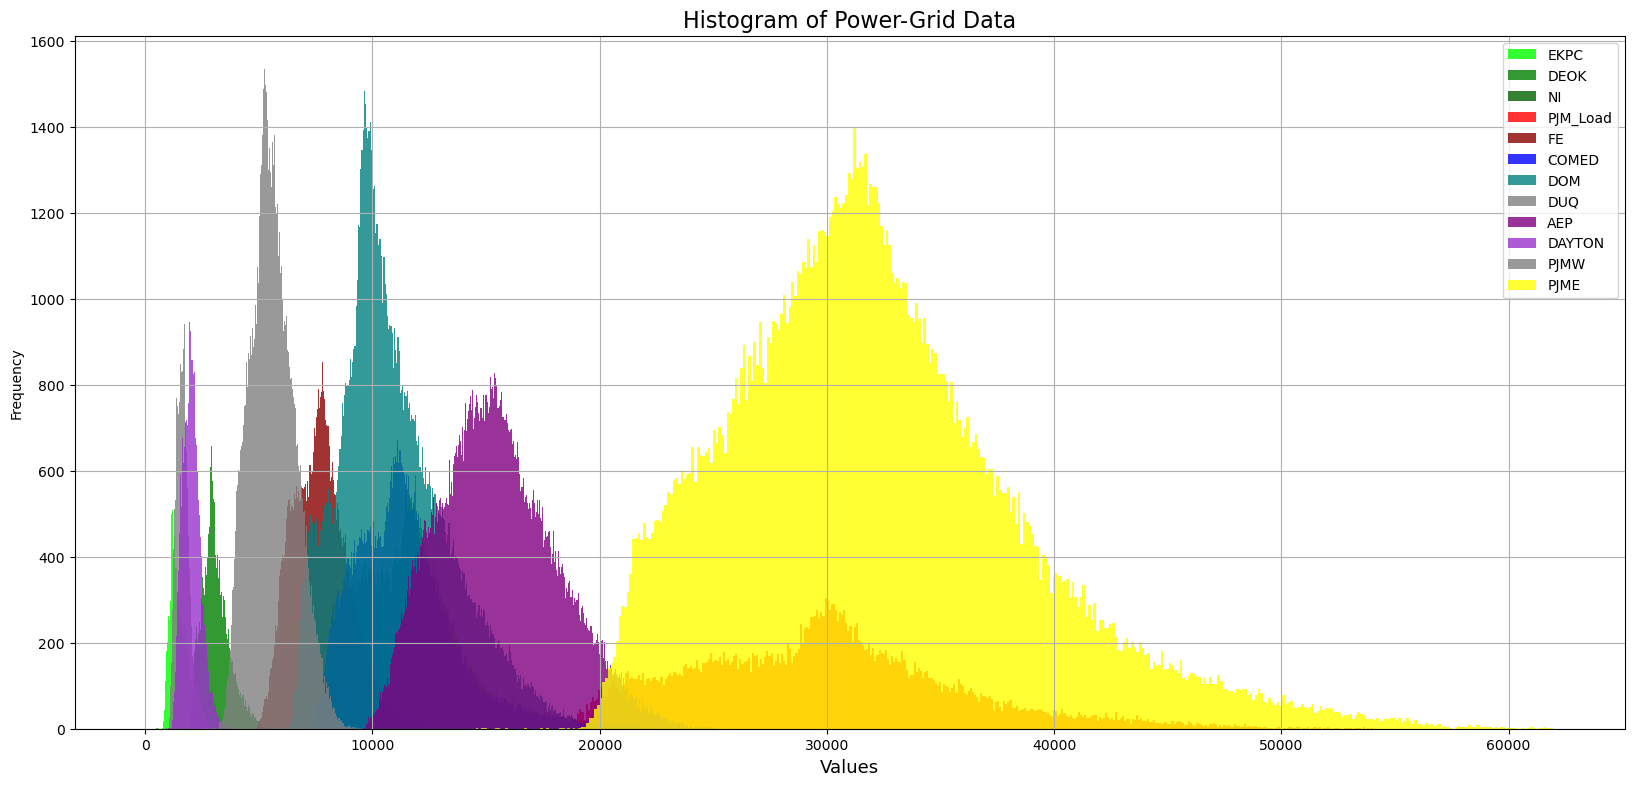

In [9]:
import seaborn as sns
fig,ax1=plt.subplots(figsize=(20,9))
hist_data=[df.EKPC,df.DEOK,df.NI,df.PJM_Load,df.FE,df.COMED,df.DOM,df.DUQ,df.AEP,df.DAYTON,df.PJMW,df.PJME]
hist_color=['lime','green','darkgreen','red','darkred','blue','teal','gray','purple','darkorchid','gray','yellow']
hist_label=["EKPC","DEOK","NI","PJM_Load","FE","COMED","DOM","DUQ","AEP","DAYTON","PJMW","PJME"]
for i, data in enumerate(hist_data):
    data.plot(kind='hist',color=hist_color[i],bins=400,fill=True,alpha=0.8)
ax1.legend()
ax1.set_title('Histogram of Power-Grid Data',fontsize=16)
ax1.set_xlabel('Values',fontsize=13)
ax1.grid(True)
plt.show()

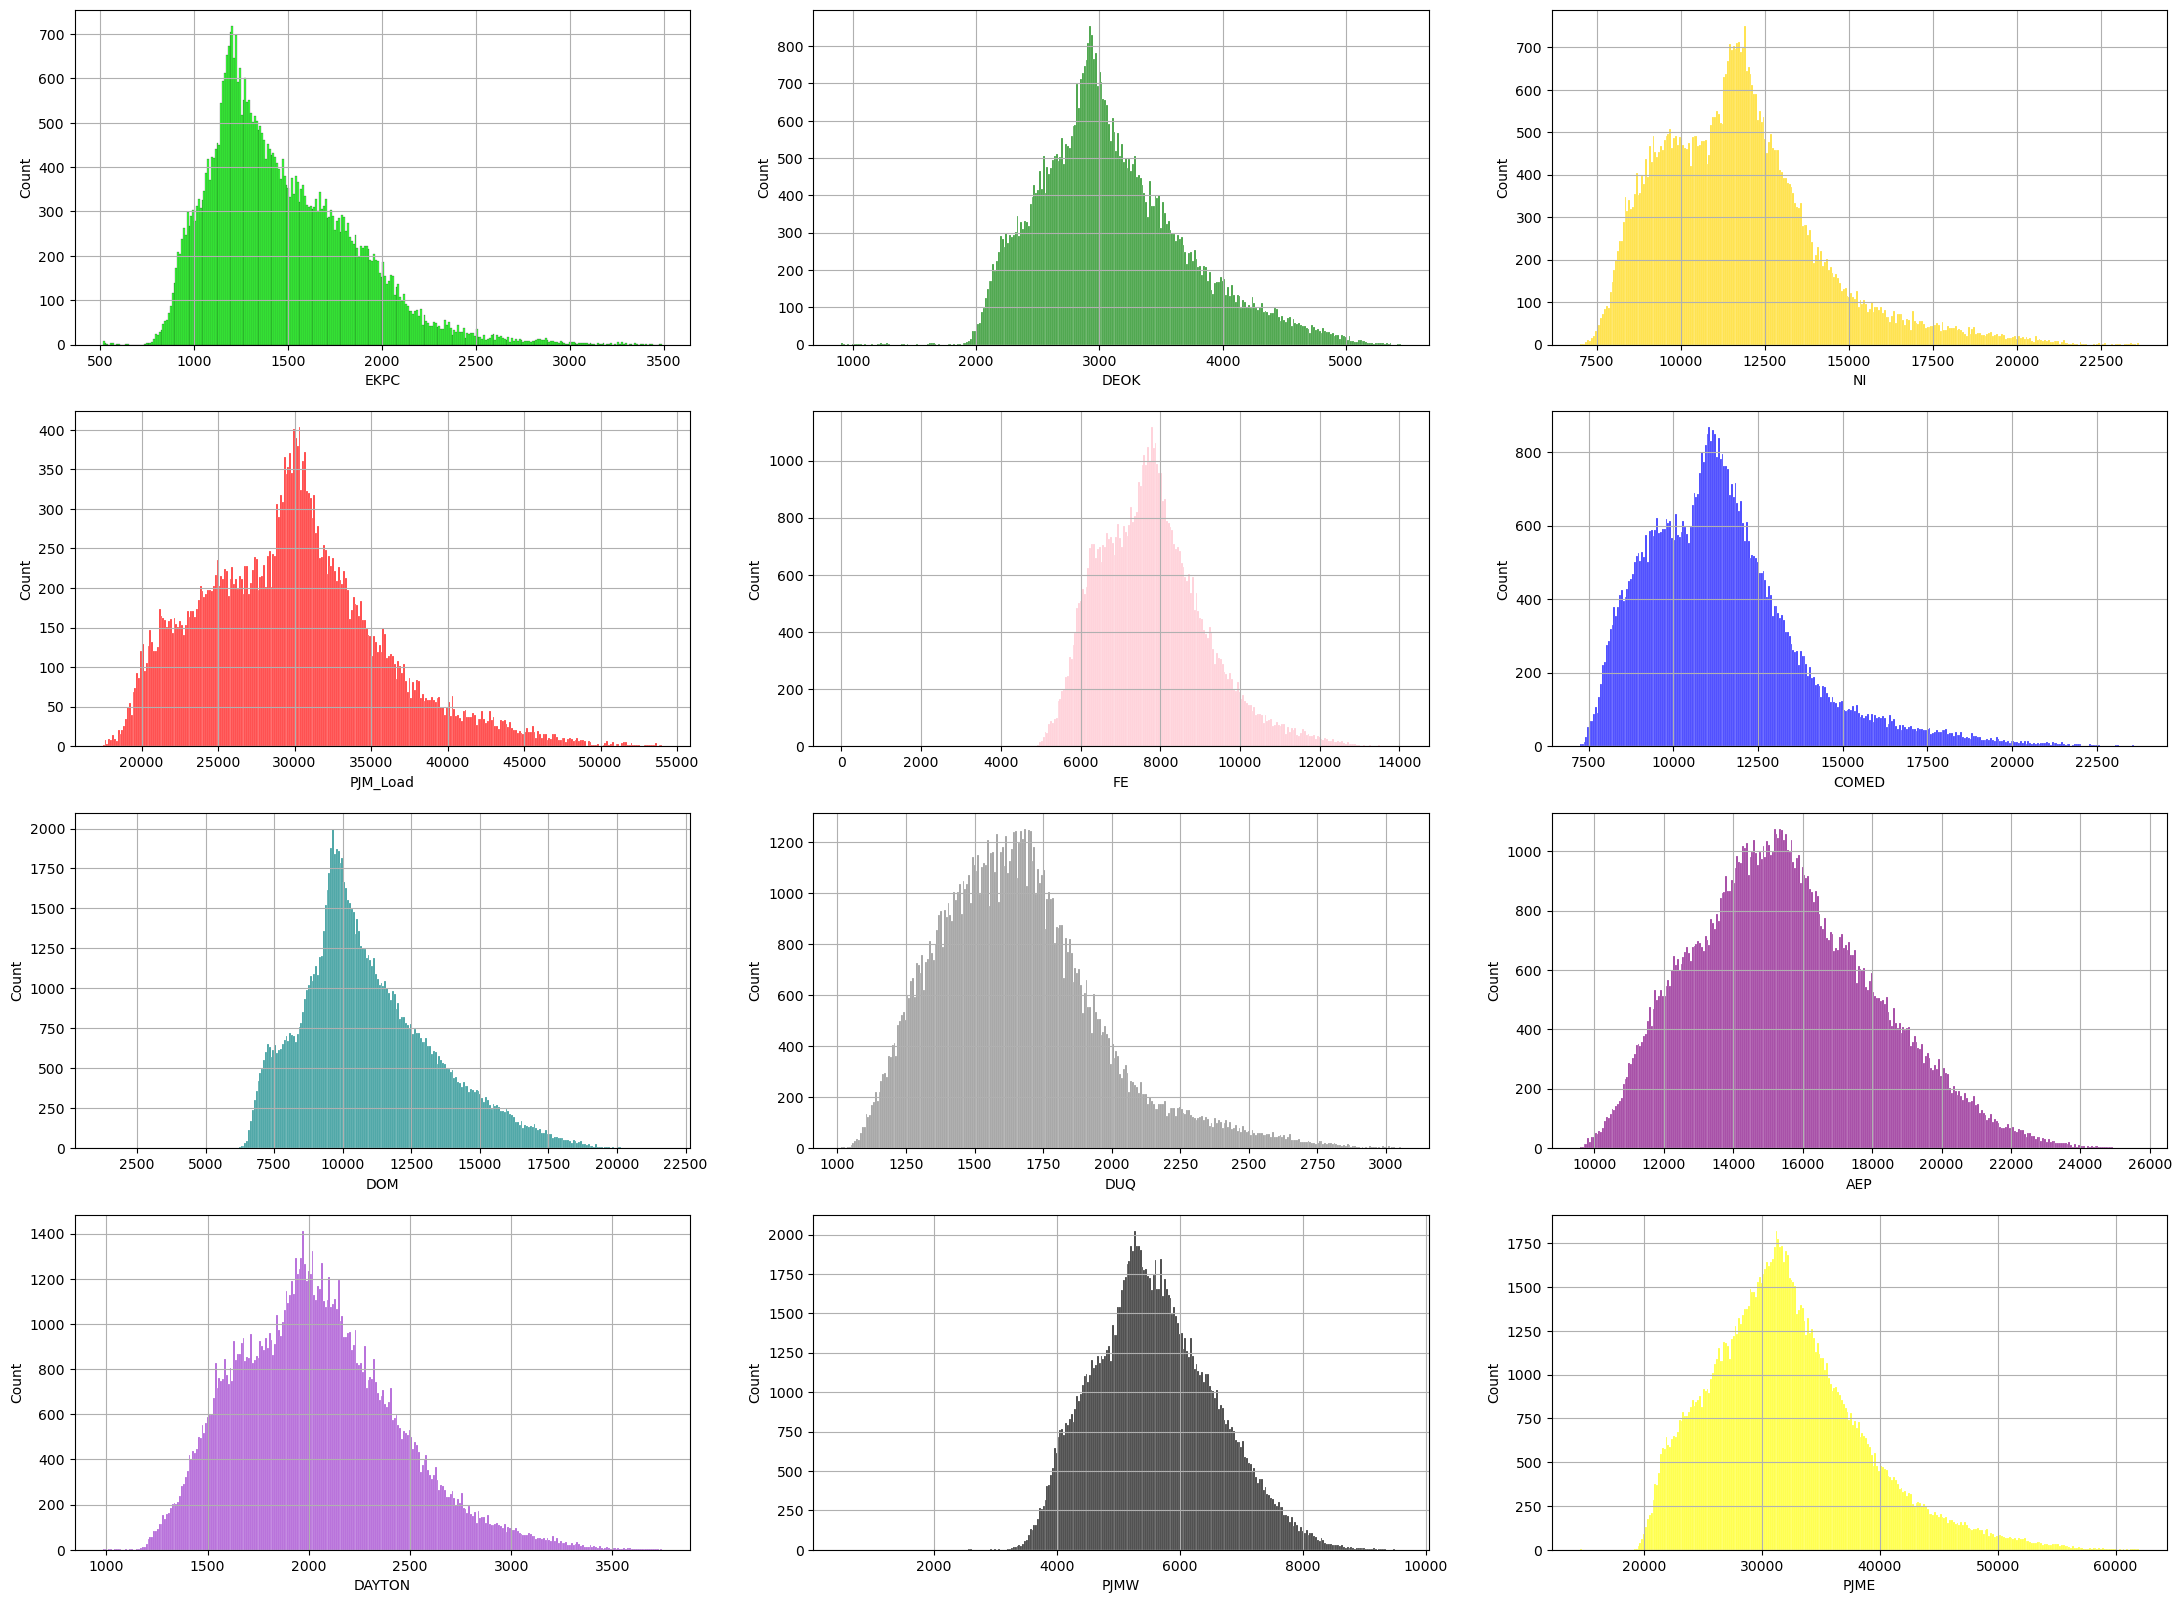

In [10]:
fig,axs=plt.subplots(4,3,figsize=(27,20))
hist_data=[df.EKPC,df.DEOK,df.NI,df.PJM_Load,df.FE,df.COMED,df.DOM,df.DUQ,df.AEP,df.DAYTON,df.PJMW,df.PJME]
hist_color=['lime','green','gold','red','pink','blue','teal','gray','purple','darkorchid','black','yellow']
hist_label=["EKPC","DEOK","NI","PJM_Load","FE","COMED","DOM","DUQ","AEP","DAYTON","PJMW","PJME"]
for i,ax in enumerate(axs.flatten()):
    sns.histplot(data=hist_data[i],bins=300,color=hist_color[i],ax=ax)
    ax.set_xlabel(hist_label[i])
    sns.set(style='white')
    ax.grid(True)
plt.show()

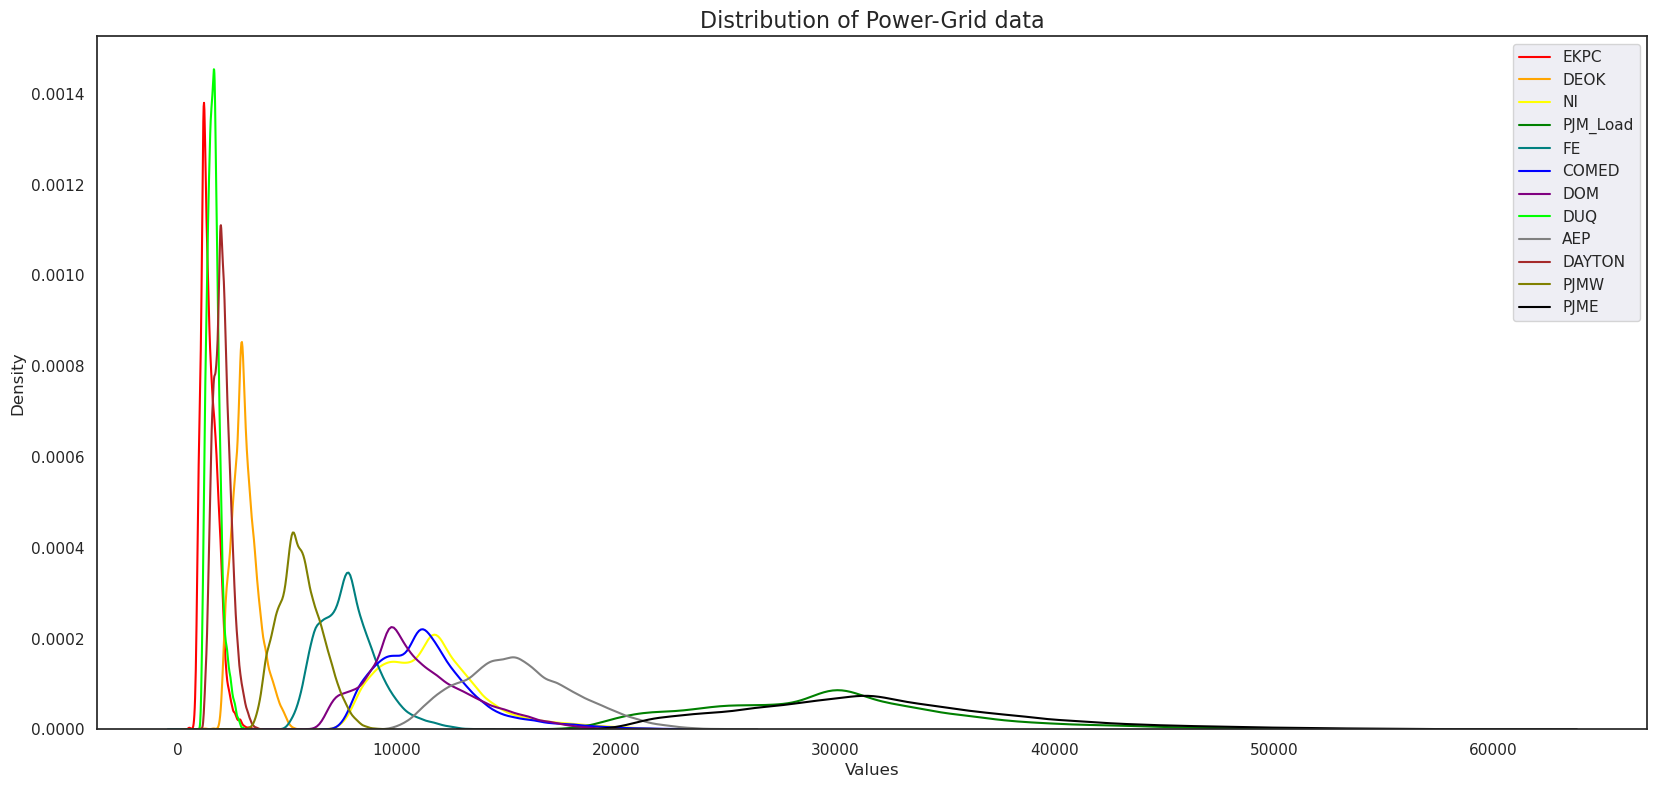

In [11]:
import seaborn as sns
fig,ax2=plt.subplots(figsize=(20,9))
kde_data=[df.EKPC,df.DEOK,df.NI,df.PJM_Load,df.FE,df.COMED,df.DOM,df.DUQ,df.AEP,df.DAYTON,df.PJMW,df.PJME]
kde_labels=["EKPC","DEOK","NI","PJM_Load","FE","COMED","DOM","DUQ","AEP","DAYTON","PJMW","PJME"]
kde_colors=['red','orange','yellow','green','teal','blue','purple','lime','gray','brown','olive','black']
for i in range(len(kde_data)):
    sns.kdeplot(data=kde_data[i],label=kde_labels[i],ax=ax2,color=kde_colors[i],fill=False)
    ax2.annotate(kde_labels[i],xy=(1.5*i,3),color=kde_colors[i])
    sns.set_style('darkgrid')
ax2.legend()
ax2.set_title('Distribution of Power-Grid data',fontsize=16)
ax2.set_xlabel('Values')
plt.show()

In [12]:
Aep_d = df.loc[:,['AEP']]
COMED_d = pd.DataFrame(df['COMED'])
DAYTON_d = df.loc[:,['DAYTON']]
DEOK_d = pd.DataFrame(df['DEOK'])
EKPC_d = df.loc[:,['EKPC']]
PJMW_d = df.loc[:,['PJMW']]
PJME_d = df.loc[:,['PJME']]
DOM_d = df.loc[:,['DOM']]
DUQ_d = df.loc[:,['DUQ']]
FE_d = df.loc[:,['FE']]
NI_d = pd.DataFrame(df['NI'])
PJM_Load_d = pd.DataFrame(df['PJM_Load'])

In [13]:
Aep_d.dropna(subset=['AEP'],inplace=True)

In [14]:
Aep_d.head(5)

,AEP
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0


<AxesSubplot:title={'center':'AEP'}, xlabel='Datetime'>

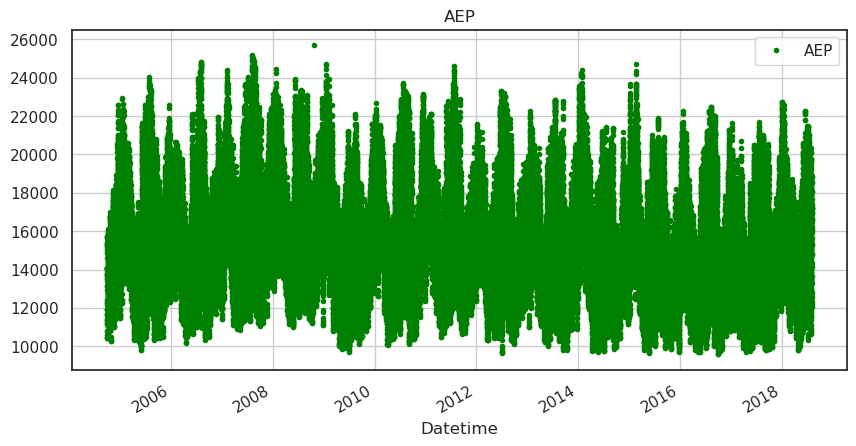

In [15]:
sns.set(style='white')
Aep_d.plot(style='.',color='green',figsize=(10,5),title='AEP',grid=True)

# Outliers Removal

<AxesSubplot:xlabel='Datetime'>

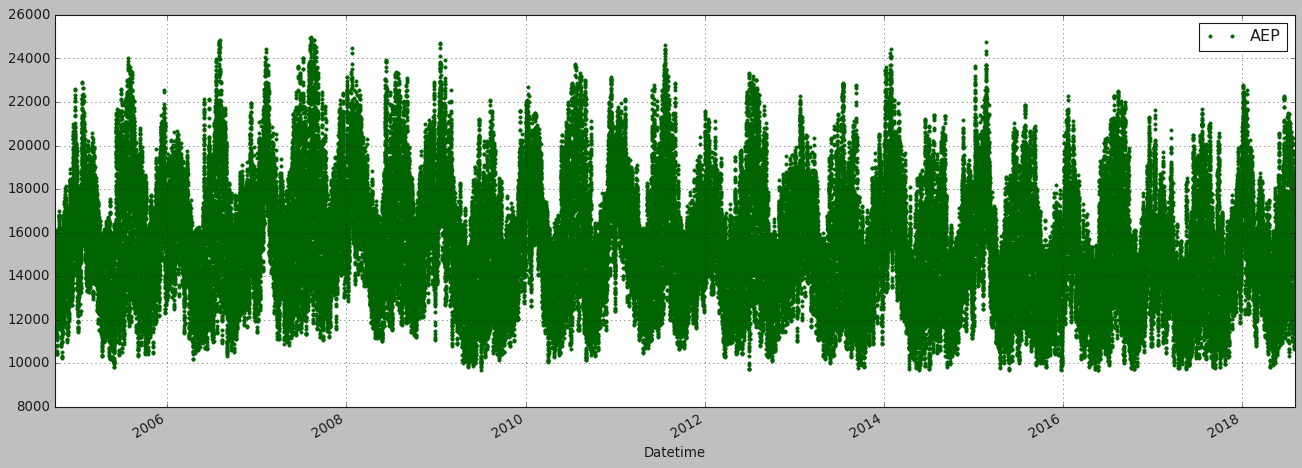

In [16]:
Acceptable_range=(9700,25000)
Aep_d=Aep_d[Aep_d['AEP'].between(*Acceptable_range)]
plt.style.use('classic')
Aep_d.plot(style='.',color='darkgreen',figsize=(20,7),grid=True)

# Adding new Features to the DataFrame.

In [17]:
from pandas.api.types import CategoricalDtype
cate=CategoricalDtype(categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],ordered=True)
def create_features(Aep_d,label=None):
    Aep_d=Aep_d.copy()
    Aep_d['date']=Aep_d.index
    Aep_d['hour']=Aep_d['date'].dt.hour
    Aep_d['dayofweek']=Aep_d['date'].dt.dayofweek
    Aep_d['weekday']=Aep_d['date'].dt.day_name()
    Aep_d['weekday']=Aep_d['weekday'].astype(cate)
    Aep_d['quarter']=Aep_d['date'].dt.quarter
    Aep_d['month']=Aep_d['date'].dt.month
    Aep_d['year']=Aep_d['date'].dt.year
    Aep_d['dayofyear']=Aep_d['date'].dt.dayofyear
    Aep_d['dayofmonth']=Aep_d['date'].dt.day
    Aep_d['weekofyear']=Aep_d['date'].dt.isocalendar().week
    Aep_d['date_offset']=(Aep_d.date.dt.month*100 + Aep_d.date.dt.day - 320) % 1300
    Aep_d['Seasons']=pd.cut(Aep_d['date_offset'],[0,300,602,900,1300],labels=['Spring','Summer','Fall','Winter'])
    X=Aep_d[['hour','dayofweek','quarter','month','year','dayofyear','dayofmonth','weekofyear','weekday','Seasons']]
    if label:
        y=Aep_d[label]
        return X,y
    return X
X,y = create_features(Aep_d,label='AEP')
features_and_target=pd.concat([X,y],axis=1)

In [18]:
features_and_target

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,weekday,Seasons,AEP
Datetime,,,,,,,,,,,
2004-12-31 01:00:00,1,4,4,12,2004,366,31,53,Friday,Winter,13478.0
2004-12-31 02:00:00,2,4,4,12,2004,366,31,53,Friday,Winter,12865.0
2004-12-31 03:00:00,3,4,4,12,2004,366,31,53,Friday,Winter,12577.0
2004-12-31 04:00:00,4,4,4,12,2004,366,31,53,Friday,Winter,12517.0
2004-12-31 05:00:00,5,4,4,12,2004,366,31,53,Friday,Winter,12670.0
...,...,...,...,...,...,...,...,...,...,...,...
2018-01-01 20:00:00,20,0,1,1,2018,1,1,1,Monday,Winter,21089.0
2018-01-01 21:00:00,21,0,1,1,2018,1,1,1,Monday,Winter,20999.0
2018-01-01 22:00:00,22,0,1,1,2018,1,1,1,Monday,Winter,20820.0


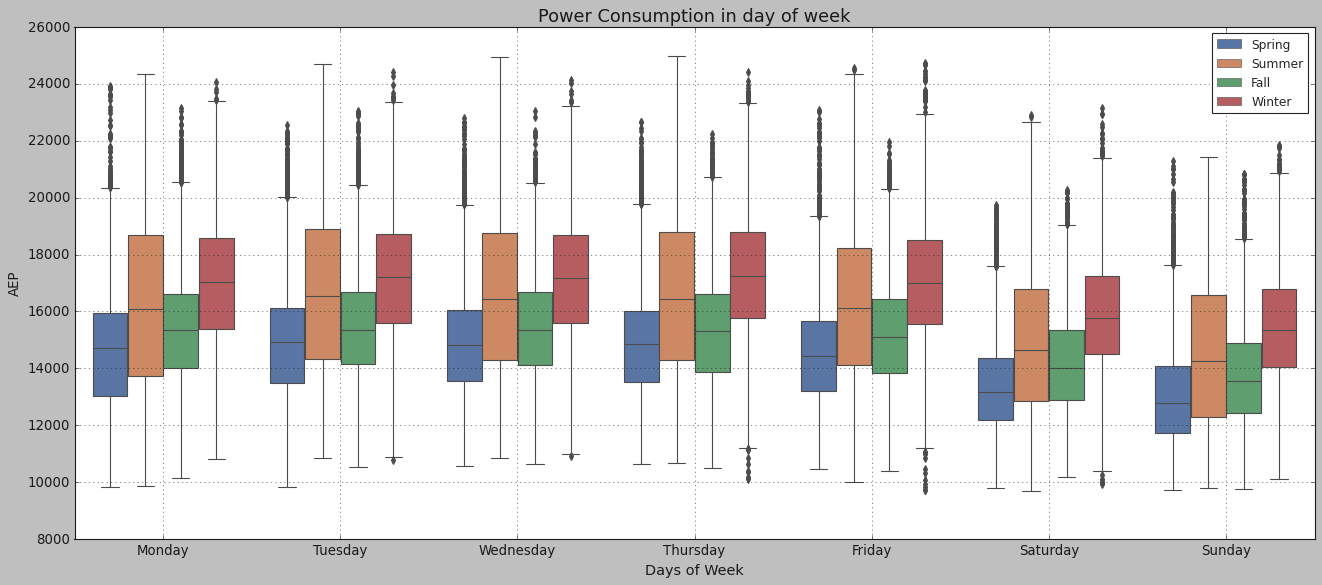

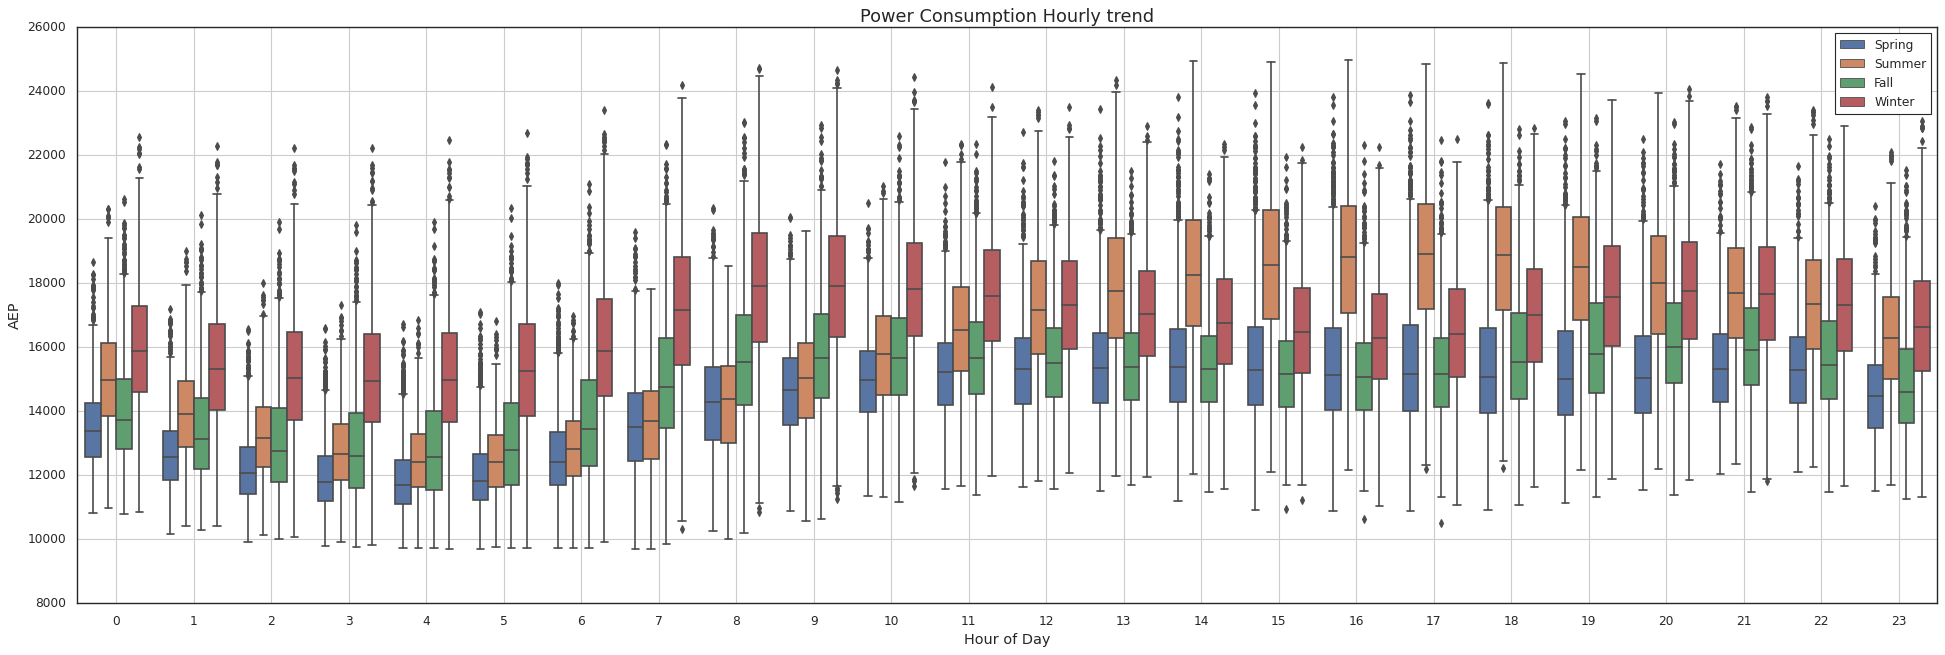

In [19]:
fig,AX=plt.subplots(figsize=(20,8))
sns.set(style='white')
sns.boxplot(data=features_and_target,hue='Seasons',x='weekday',y='AEP',ax=AX,linewidth=1)
AX.set_title('Power Consumption in day of week',fontsize=16)
AX.set_xlabel('Days of Week',fontsize=13)
AX.set_ylabel('AEP')
AX.grid(True)
AX.legend(bbox_to_anchor=(1,1))
fig,Ax=plt.subplots(figsize=(30,9))
sns.set(style='white')
sns.boxplot(data=features_and_target,x='hour',y='AEP',ax=Ax,hue='Seasons')
Ax.set_title('Power Consumption Hourly trend',fontsize=16)
Ax.set_xlabel('Hour of Day',fontsize=13)
Ax.set_ylabel('AEP',fontsize=13)
Ax.grid(True)
Ax.legend(bbox_to_anchor=(1,1))

In [20]:
features_and_target.head(2)

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,weekday,Seasons,AEP
Datetime,,,,,,,,,,,
2004-12-31 01:00:00,1,4,4,12,2004,366,31,53,Friday,Winter,13478.0
2004-12-31 02:00:00,2,4,4,12,2004,366,31,53,Friday,Winter,12865.0


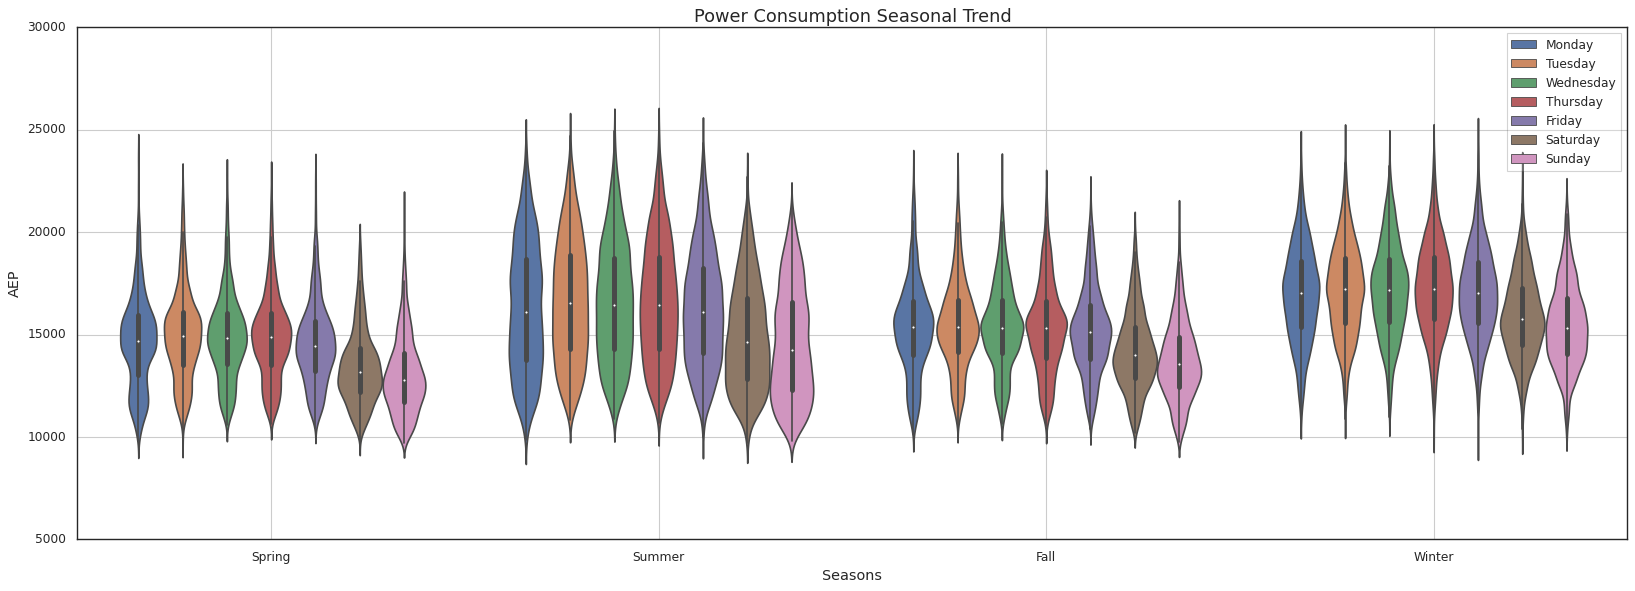

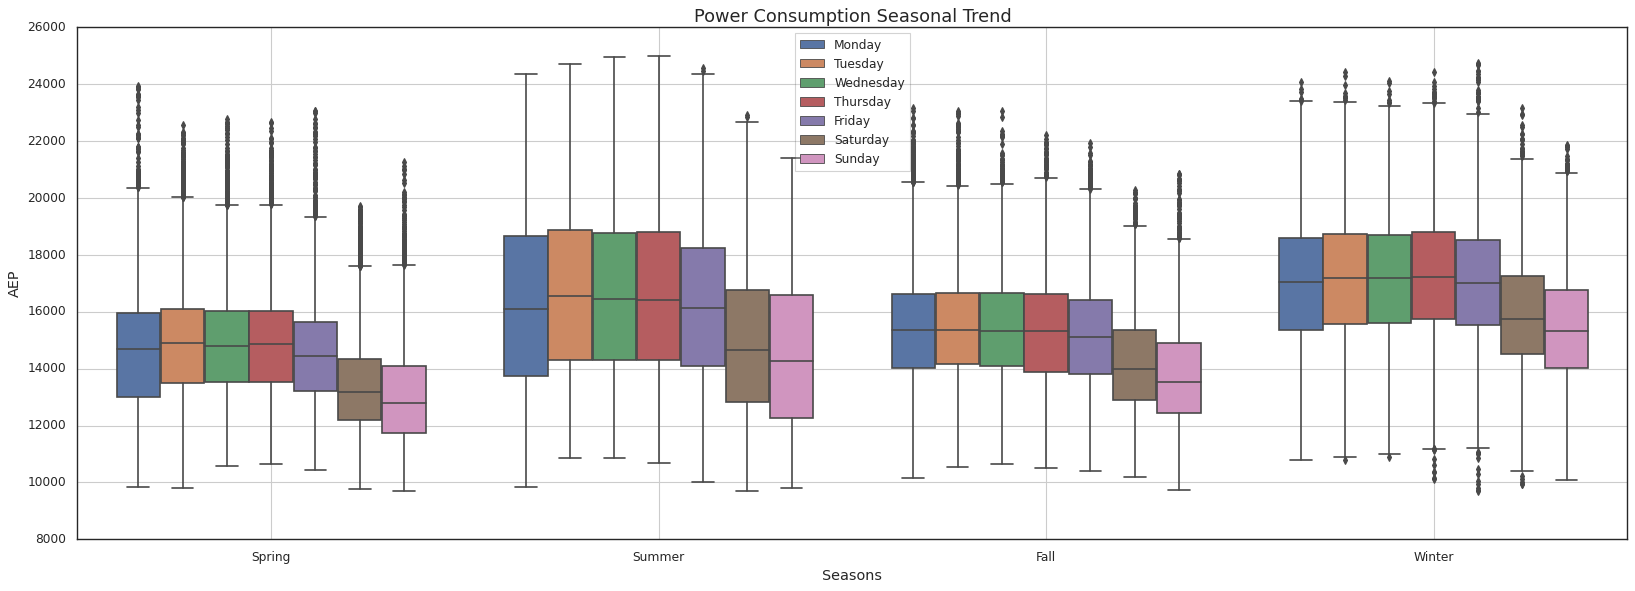

In [21]:
fig,aX=plt.subplots(figsize=(25,8))
sns.violinplot(data=features_and_target,x='Seasons',y='AEP',hue='weekday',ax=aX)
aX.grid(True)
aX.set_title('Power Consumption Seasonal Trend',fontsize=16)
aX.set_xlabel('Seasons',fontsize=13)
aX.set_ylabel('AEP',fontsize=13)
legend=aX.legend(loc='best')
legend.get_frame().set_alpha(0.2)

fig,bX=plt.subplots(figsize=(25,8))
sns.boxplot(data=features_and_target,x='Seasons',y='AEP',hue='weekday',ax=bX)
bX.grid(True)
bX.set_title('Power Consumption Seasonal Trend',fontsize=16)
bX.set_xlabel('Seasons',fontsize=13)
bX.set_ylabel('AEP',fontsize=13)
legend=bX.legend(loc='upper center')
legend.get_frame().set_alpha(0.2)

Text(0, 0.5, 'AEP')

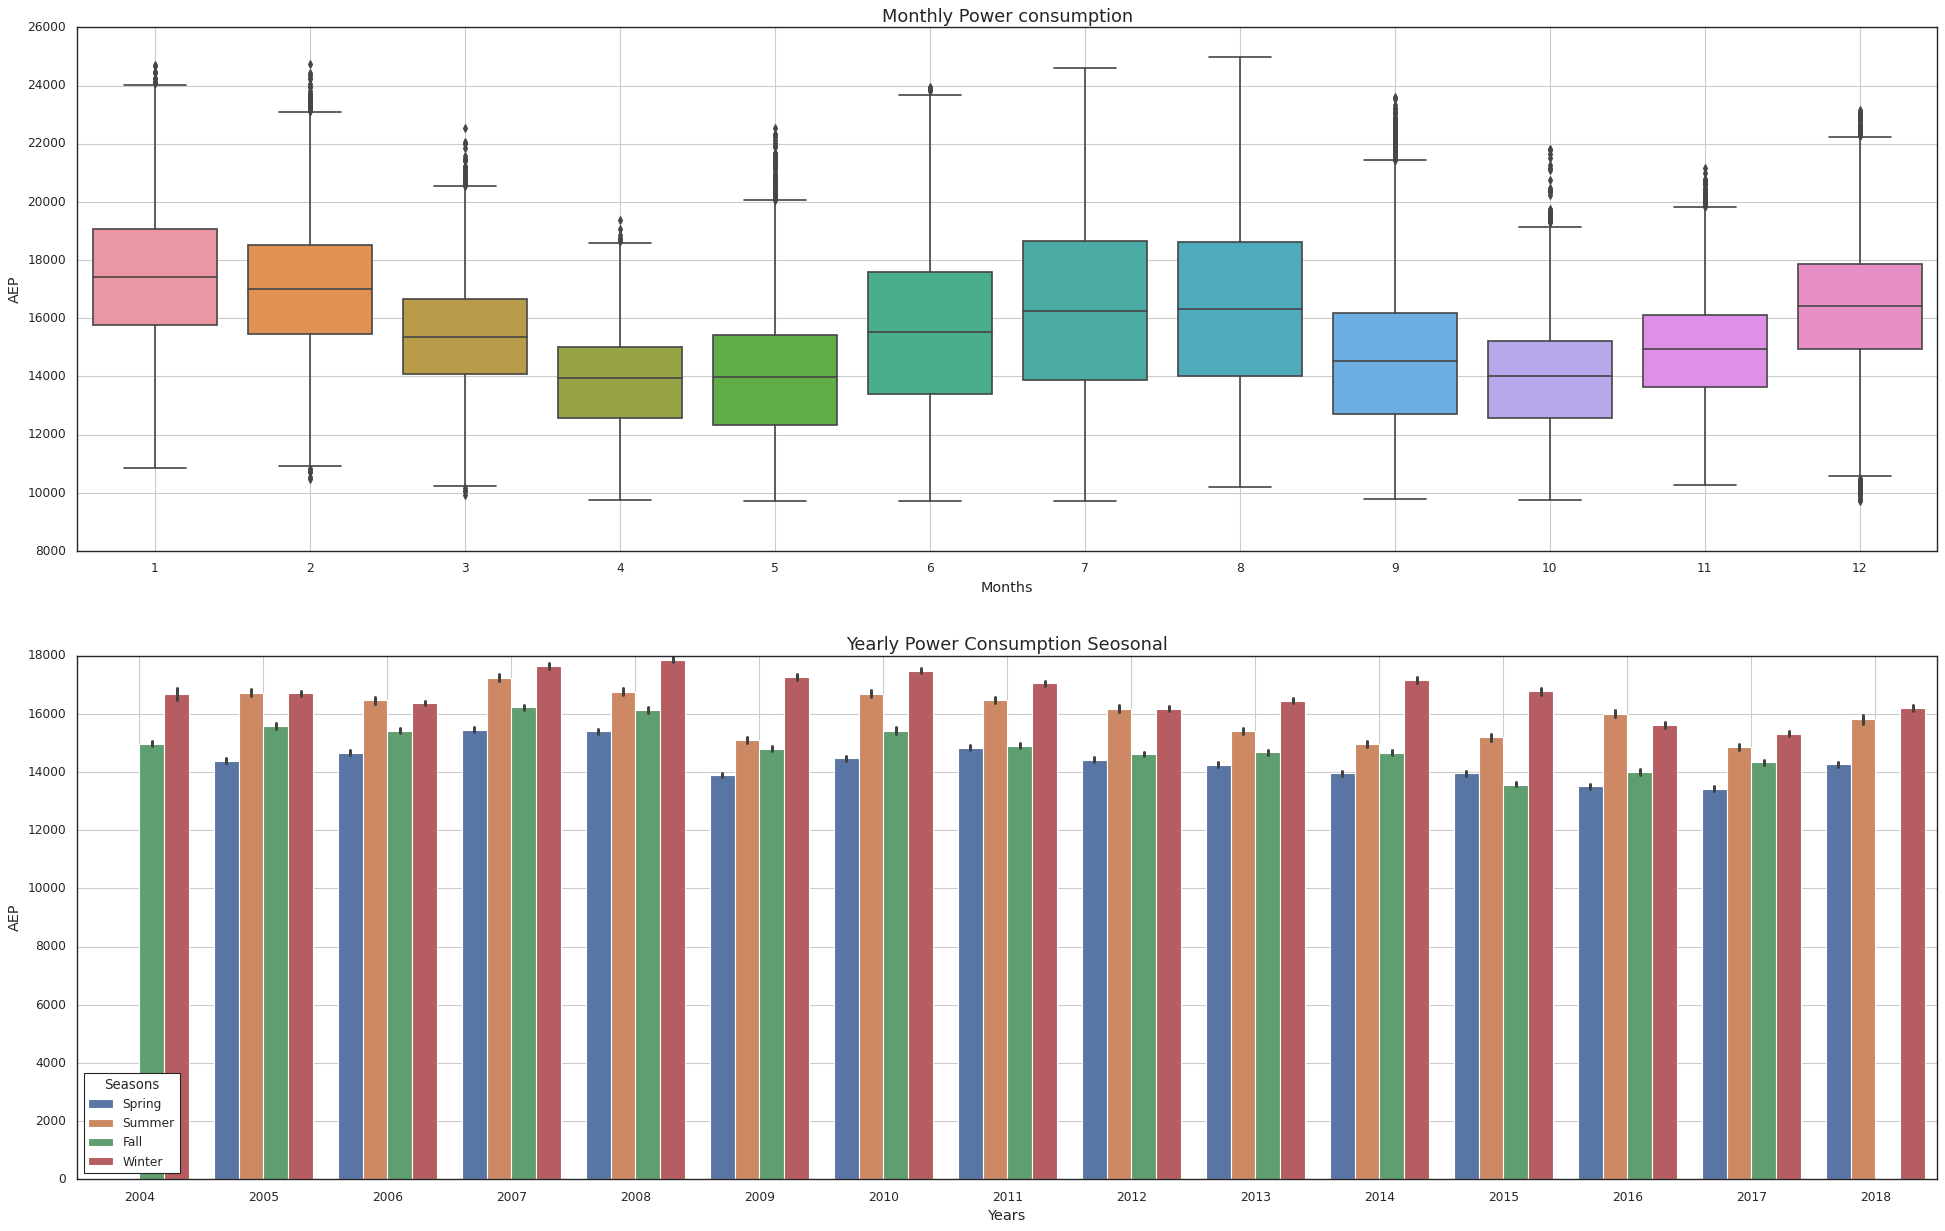

In [22]:
fig,(bx,Bx)=plt.subplots(nrows=2,figsize=(30,18))
sns.set_style('ticks')
sns.boxplot(data=features_and_target,x='month',y='AEP',ax=bx)
bx.grid(True)
bx.set_title('Monthly Power consumption',fontsize=16)
bx.set_xlabel('Months',fontsize=13)
bx.set_ylabel('AEP',fontsize=13)
sns.barplot(data=features_and_target,x='year',y='AEP',hue='Seasons',ax=Bx)
Bx.grid(True)
Bx.set_title('Yearly Power Consumption Seosonal',fontsize=16)
Bx.set_xlabel('Years',fontsize=13)
Bx.set_ylabel('AEP',fontsize=13)

Text(0, 0.5, 'AEP')

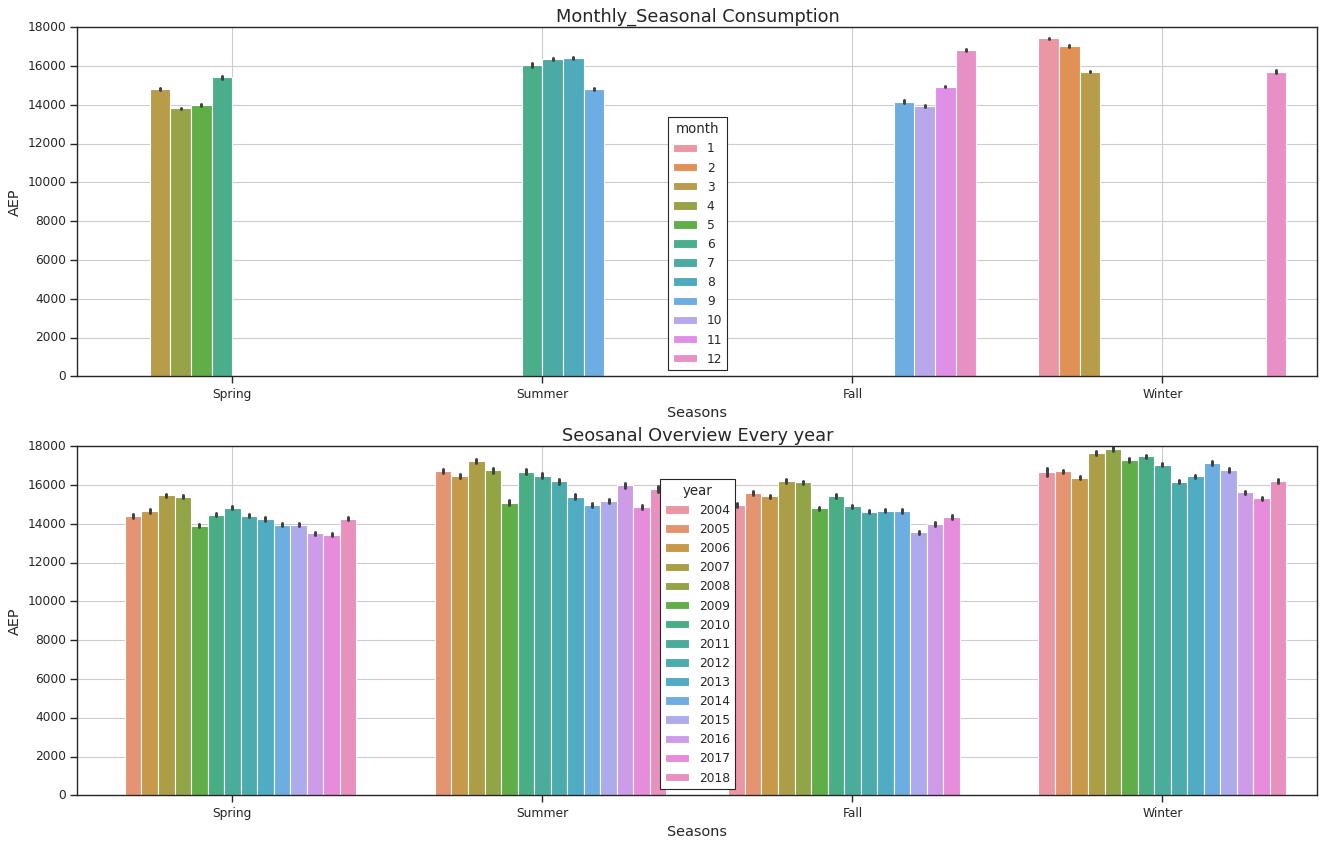

In [23]:
fig,(cX,Cx)=plt.subplots(nrows=2,figsize=(20,12))
sns.barplot(data=features_and_target,x='Seasons',y='AEP',hue='month',ax=cX)
cX.grid(True)
cX.set_title('Monthly_Seasonal Consumption',fontsize=16)
cX.set_xlabel('Seasons',fontsize=13)
cX.set_ylabel('AEP',fontsize=13)
sns.barplot(data=features_and_target,x='Seasons',y='AEP',hue='year',ax=Cx)
Cx.grid(True)
Cx.set_title('Seosanal Overview Every year',fontsize=16)
Cx.set_xlabel('Seasons',fontsize=13)
Cx.set_ylabel('AEP',fontsize=13)

Text(0.5, 1.0, 'Training and Test data Visualization')

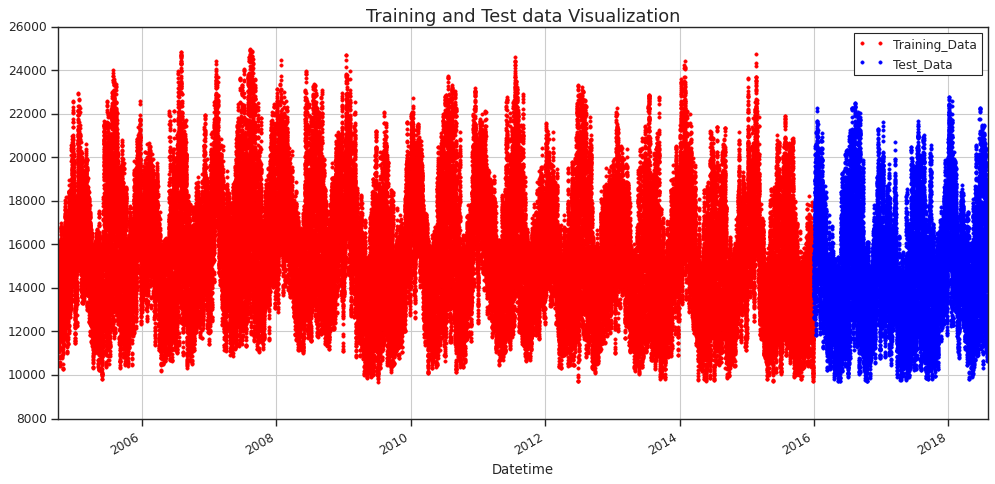

In [24]:
fig,Ax1=plt.subplots(figsize=(15,7))
Aep_d.loc[Aep_d.index<='01-01-2016'].plot(style='.',color='red',ax=Ax1,grid=True)
Aep_d.loc[Aep_d.index>'01-01-2016'].plot(style='.',color='blue',ax=Ax1,grid=True)
Ax1.legend(['Training_Data','Test_Data'])
Ax1.set_title('Training and Test data Visualization',fontsize=16)

# Preparing Data from FBProphet Model

In [25]:
Aep_d_training=Aep_d.loc[Aep_d.index<='01-01-2016']
Aep_d_testing=Aep_d.loc[Aep_d.index>'01-01-2016']
Aep_d_FP=Aep_d_training.reset_index().rename(columns={'Datetime':'ds','AEP':'y'})
Aep_d_FP.head(5)

,ds,y
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


# Prediction using Fbprophet

In [26]:
#!pip install prophet

In [27]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [28]:
%%time
model=Prophet()
model.fit(Aep_d_FP)

12:22:07 - cmdstanpy - INFO - Chain [1] start processing
12:24:12 - cmdstanpy - INFO - Chain [1] done processing


CPU times: user 14 s, sys: 793 ms, total: 14.8 s
Wall time: 2min 21s


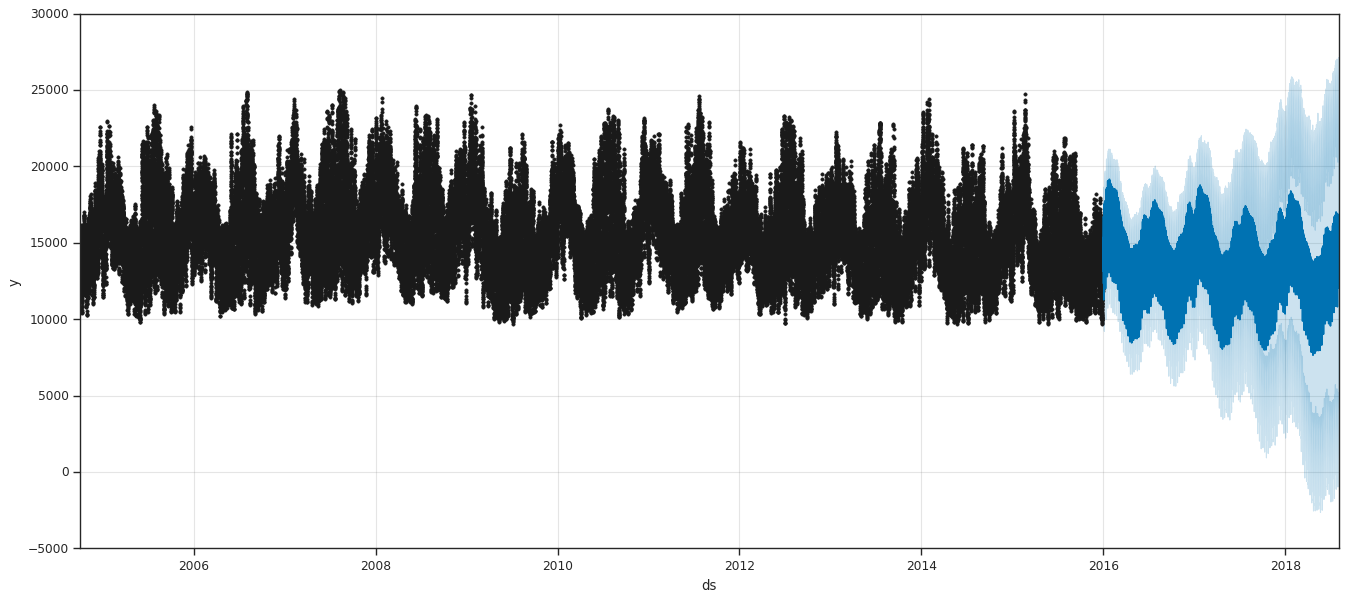

In [29]:
Aep_d_FPtst=Aep_d_testing.reset_index().rename(columns={'Datetime':'ds','Aep':'y'})
Aep_d_ForeCast=model.predict(Aep_d_FPtst)
fig=model.plot(Aep_d_ForeCast)
fig.set_size_inches(18,8)

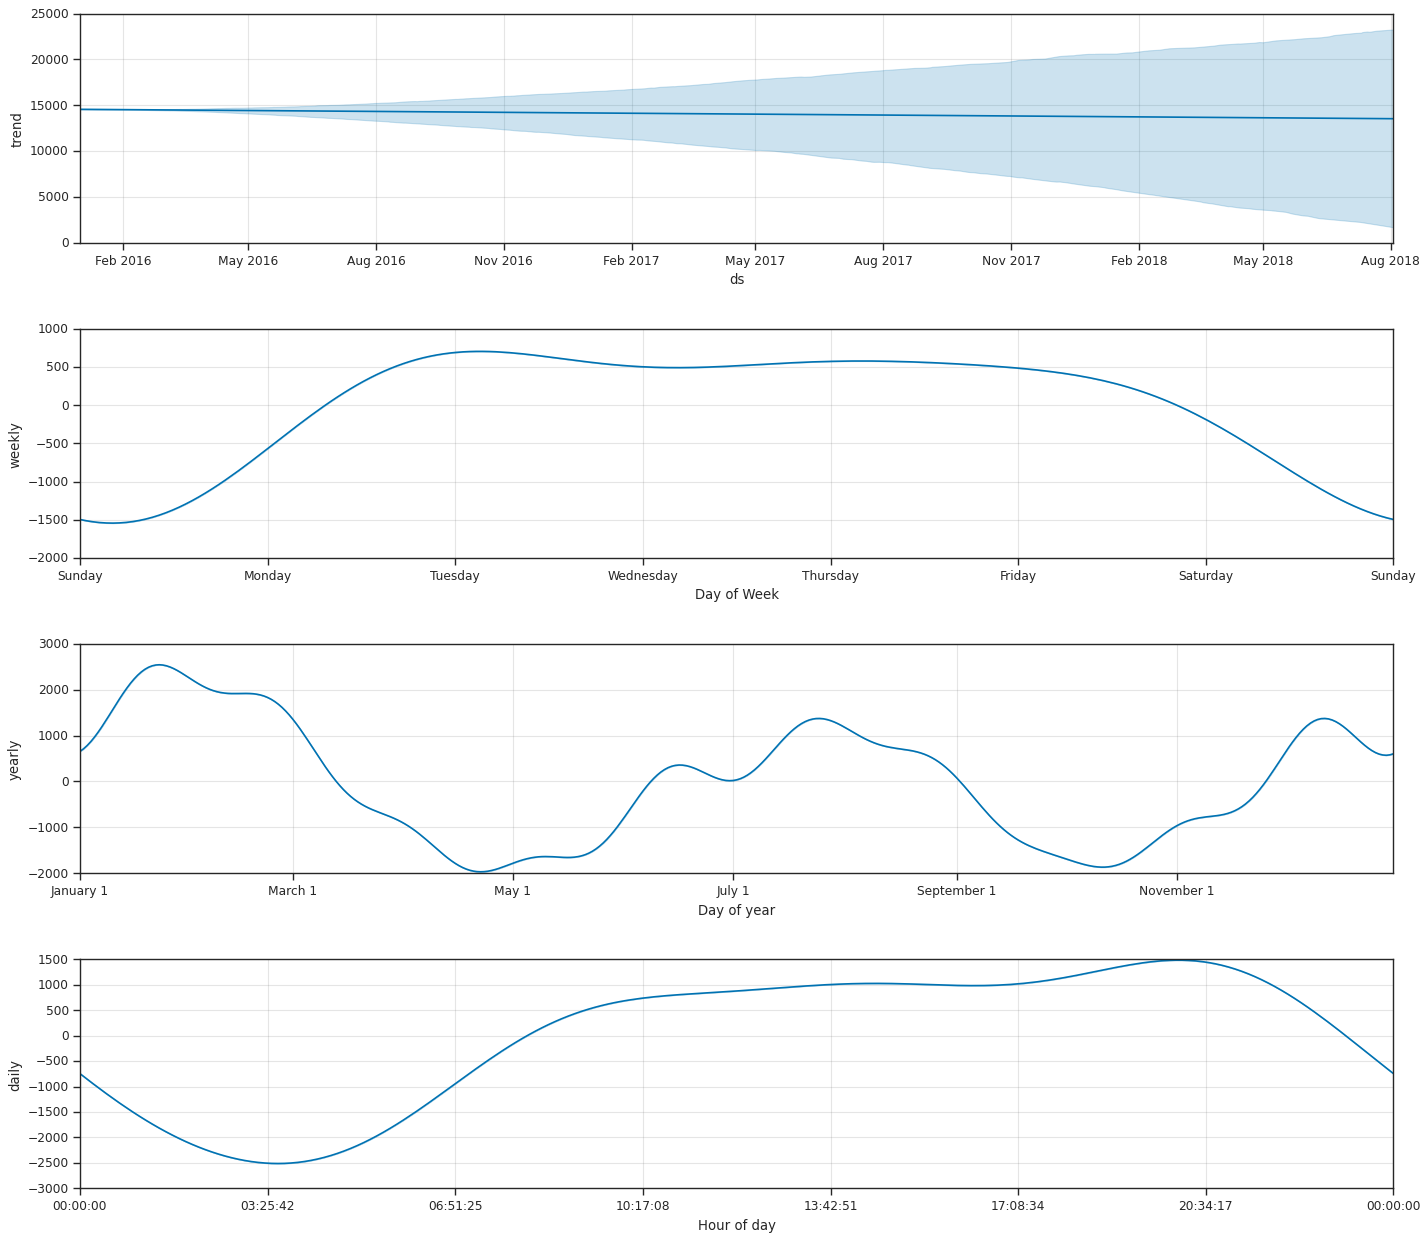

In [30]:
fig1=model.plot_components(Aep_d_ForeCast)
fig1.set_size_inches(20,16)

In [31]:
Aep_d_ForeCast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01 01:00:00,14557.969625,12211.254148,16206.295553,14557.969625,14557.969625,-424.202645,-424.202645,-424.202645,-1523.838532,...,475.830717,475.830717,475.830717,623.805170,623.805170,623.805170,0.0,0.0,0.0,14133.766980
1,2016-01-01 02:00:00,14557.924476,11502.332486,15565.894984,14557.924476,14557.924476,-1022.241650,-1022.241650,-1022.241650,-2113.273134,...,465.569392,465.569392,465.569392,625.462091,625.462091,625.462091,0.0,0.0,0.0,13535.682826
2,2016-01-01 03:00:00,14557.879327,11252.249904,15023.936149,14557.879327,14557.879327,-1369.516942,-1369.516942,-1369.516942,-2451.082780,...,454.420654,454.420654,454.420654,627.145184,627.145184,627.145184,0.0,0.0,0.0,13188.362385
3,2016-01-01 04:00:00,14557.834179,11217.370323,15115.799131,14557.834179,14557.834179,-1417.005311,-1417.005311,-1417.005311,-2488.132576,...,442.272841,442.272841,442.272841,628.854424,628.854424,628.854424,0.0,0.0,0.0,13140.828868
4,2016-01-01 05:00:00,14557.789030,11480.956710,15468.192276,14557.789030,14557.789030,-1132.549993,-1132.549993,-1132.549993,-2192.146800,...,429.007020,429.007020,429.007020,630.589787,630.589787,630.589787,0.0,0.0,0.0,13425.239037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22670,2018-08-02 20:00:00,13534.223647,4416.841331,26490.324978,1694.581203,23269.363948,3105.547406,3105.547406,3105.547406,1480.881238,...,517.087594,517.087594,517.087594,1107.578573,1107.578573,1107.578573,0.0,0.0,0.0,16639.771053
22671,2018-08-02 21:00:00,13534.178498,4381.020226,26449.709440,1693.575699,23269.775043,2958.144178,2958.144178,2958.144178,1342.577837,...,509.917433,509.917433,509.917433,1105.648908,1105.648908,1105.648908,0.0,0.0,0.0,16492.322677
22672,2018-08-02 22:00:00,13534.133350,3806.937198,25967.431774,1692.570195,23270.186137,2465.695448,2465.695448,2465.695448,859.703108,...,502.273327,502.273327,502.273327,1103.719013,1103.719013,1103.719013,0.0,0.0,0.0,15999.828798
22673,2018-08-02 23:00:00,13534.088201,3304.273965,25119.881014,1691.564691,23270.597231,1701.663555,1701.663555,1701.663555,105.780359,...,494.094228,494.094228,494.094228,1101.788969,1101.788969,1101.788969,0.0,0.0,0.0,15235.751756


# Actual And Predicted Values in Same plot for better understanding.

Text(142.08333333333334, 0.5, 'AEP_Consumption')

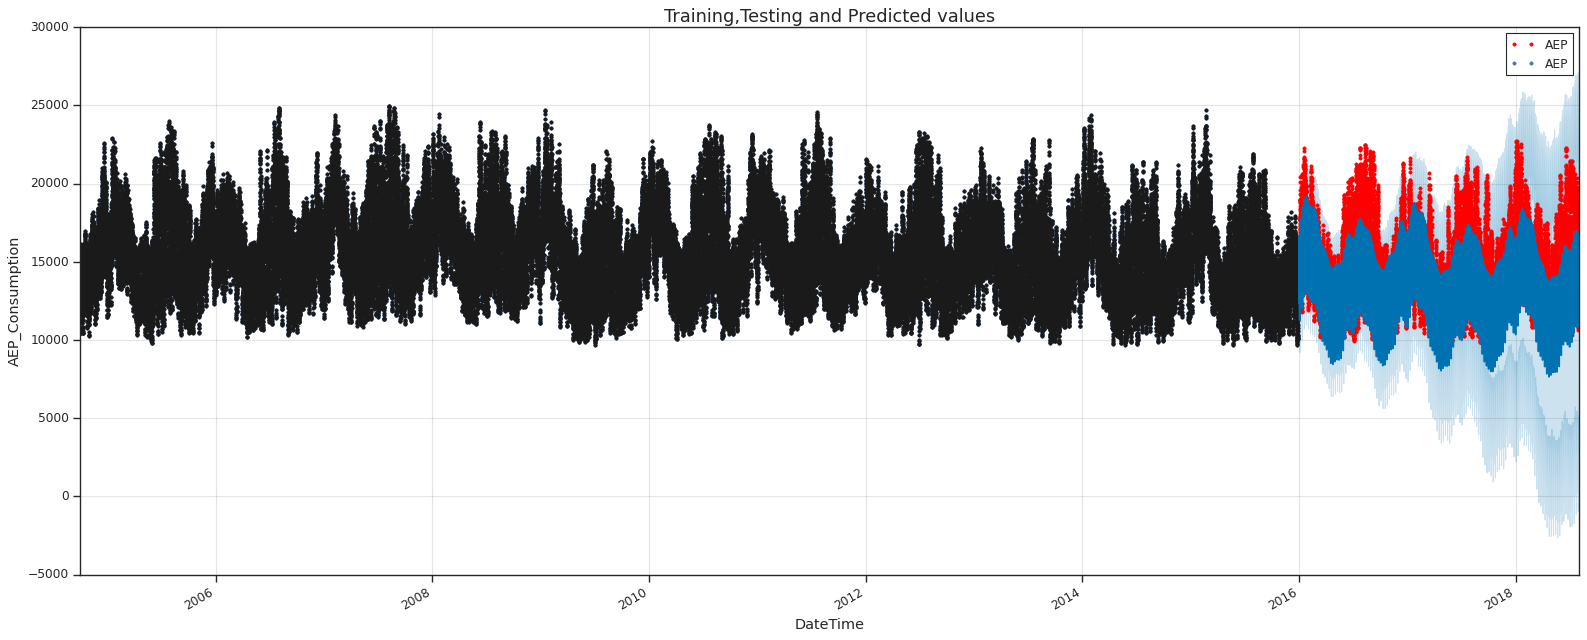

In [32]:
f,qx=plt.subplots(figsize=(20,8))
Aep_d.loc[Aep_d.index>='01-01-2016'].plot(style='.',grid=True,ax=qx,color='red',label='Training')
Aep_d.loc[Aep_d.index<'01-01-2016'].plot(style='.',grid=True,ax=qx,label='Testing')
model.plot(Aep_d_ForeCast,ax=qx)
qx.set_title('Training,Testing and Predicted values',fontsize=16)
qx.set_xlabel('DateTime',fontsize=13)
qx.set_ylabel('AEP_Consumption',fontsize=13)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1109: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  return self._getitem_tuple_same_dim(tup)


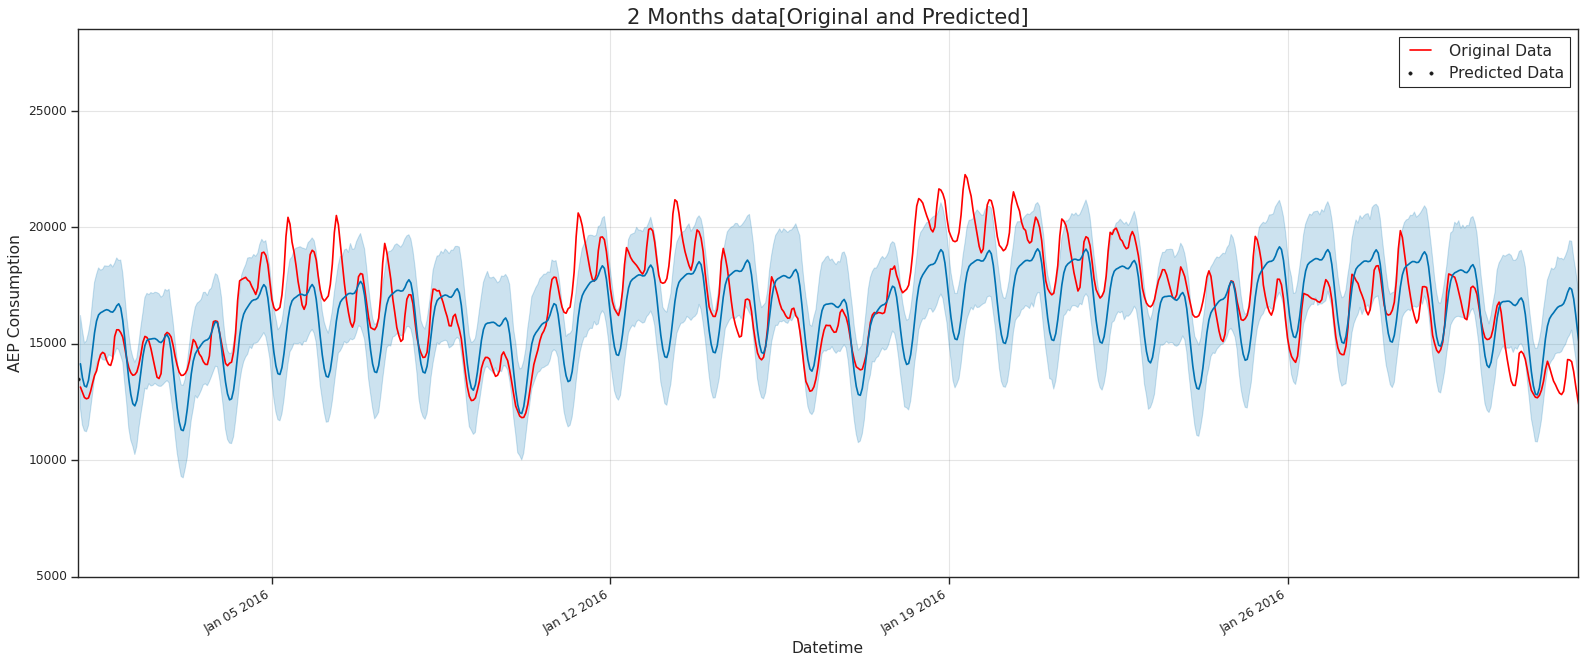

In [33]:
f,ax=plt.subplots(figsize=(20,8))
Aep_d_testing.loc['2016-01-01':'2016-02-01',['AEP']].plot(ax=ax,grid=True,color='red')
ax.grid(True)
model.plot(Aep_d_ForeCast,ax=ax)
ax.set_xbound(lower=pd.Timestamp('2016-01-01'),upper=pd.Timestamp('2016-02-01'))
ax.set_ylim(5000,28500)
ax.set_title('2 Months data[Original and Predicted]',fontsize=19)
ax.set_xlabel('Datetime',fontsize=14)
ax.set_ylabel('AEP Consumption',fontsize=14)
ax.legend(['Original Data','Predicted Data'],loc='best',fontsize=14)

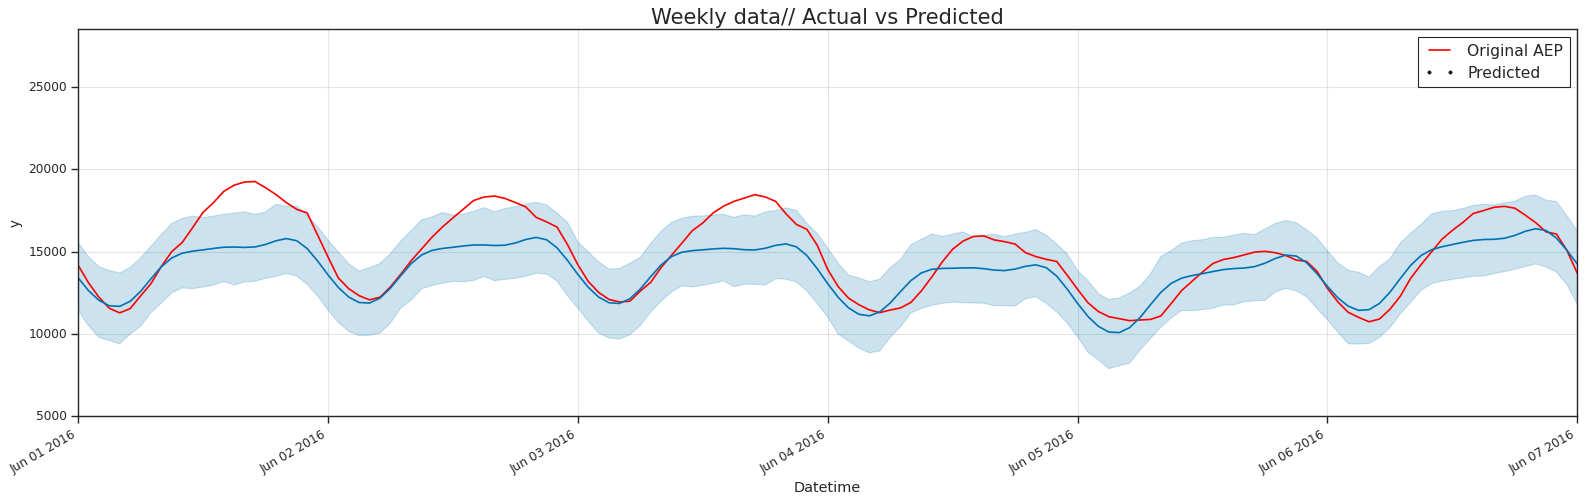

In [34]:
fig,ax=plt.subplots(figsize=(20,6))
Aep_d_testing.loc['2016-06-01':'2016-06-07',['AEP']].plot(ax=ax,color='red',grid=True)
model.plot(Aep_d_ForeCast,ax=ax)
ax.grid(True)
ax.set_xbound(lower=pd.Timestamp('2016-06-01'),upper=pd.Timestamp('2016-06-07'))
ax.set_ylim(5000,28500)
ax.set_xlabel('Datetime',fontsize=13)
ax.set_title('Weekly data// Actual vs Predicted',fontsize=19)
ax.legend(['Original AEP','Predicted'],loc='best',fontsize=14)

Text(0.5, 1.0, 'Density(KDE) Plot')

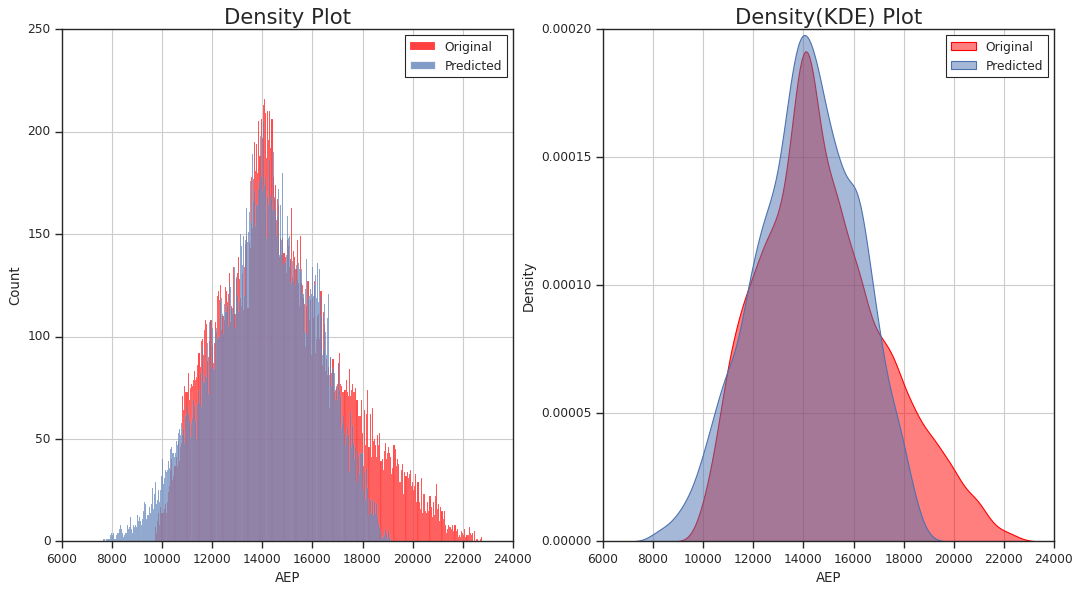

In [35]:
import seaborn as sns
fig,(ax,bx)=plt.subplots(ncols=2,figsize=(16,8))
sns.histplot(data=Aep_d_testing['AEP'],bins=300,ax=ax,color='red')
sns.histplot(data=Aep_d_ForeCast.loc[:,['yhat']],bins=300,ax=ax,alpha=0.7)
ax.legend(['Original','Predicted'])
ax.grid(True)
ax.set_title('Density Plot',fontsize=19)
sns.kdeplot(data=Aep_d_testing['AEP'],ax=bx,fill=True,color='red',alpha=0.5)
sns.kdeplot(data=Aep_d_ForeCast.loc[:,['yhat']],ax=bx,fill=True,alpha=0.5)
bx.grid(True)
bx.legend(['Original','Predicted'])
bx.set_title('Density(KDE) Plot',fontsize=19)

# Error Calculation

In [36]:
mean_squared_error(y_true=Aep_d_testing['AEP'],y_pred=Aep_d_ForeCast['yhat'])
root_meanSquared_error=np.sqrt(mean_squared_error(y_true=Aep_d_testing['AEP'],y_pred=Aep_d_ForeCast['yhat']))
root_meanSquared_error

2595.5418170323246

In [37]:
mean_absolute_error(y_true=Aep_d_testing['AEP'],y_pred=Aep_d_ForeCast['yhat'])

2042.313430229018

In [38]:
def mean_absolute_percent_error(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100
mean_absolute_percent_error(y_true=Aep_d_testing['AEP'],y_pred=Aep_d_ForeCast['yhat'])

13.559674071562283

# Future Prediction

In [39]:
Aep_FTraining=Aep_d.reset_index().rename(columns={'Datetime':'ds','AEP':'y'})
Aep_FTraining.head(3)

,ds,y
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0


In [40]:
model_f=Prophet()
model_f.fit(Aep_FTraining)

12:24:46 - cmdstanpy - INFO - Chain [1] start processing
12:27:55 - cmdstanpy - INFO - Chain [1] done processing


In [41]:
future_df=model_f.make_future_dataframe(periods=365*24,freq='h',include_history=False)

In [42]:
Future_Prediction=model_f.predict(future_df)
Future_Prediction.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
8755,2019-08-02 20:00:00,15319.348890,15252.952043,21079.864409,13436.498663,17533.116420,2812.610256,2812.610256,2812.610256,1465.429280,...,21.369862,21.369862,21.369862,1325.811115,1325.811115,1325.811115,0.0,0.0,0.0,18131.959146
8756,2019-08-02 21:00:00,15319.379141,15101.364170,21103.198286,13436.369390,17533.427436,2612.354784,2612.354784,2612.354784,1312.247942,...,-24.365325,-24.365325,-24.365325,1324.472167,1324.472167,1324.472167,0.0,0.0,0.0,17931.733925
8757,2019-08-02 22:00:00,15319.409392,14295.391327,20320.257670,13436.240116,17533.738451,2074.128983,2074.128983,2074.128983,823.479306,...,-72.483370,-72.483370,-72.483370,1323.133047,1323.133047,1323.133047,0.0,0.0,0.0,17393.538375
8758,2019-08-02 23:00:00,15319.439643,13606.405600,19682.807487,13436.110843,17534.049466,1274.720168,1274.720168,1274.720168,75.834790,...,-122.908429,-122.908429,-122.908429,1321.793808,1321.793808,1321.793808,0.0,0.0,0.0,16594.159811
8759,2019-08-03 00:00:00,15319.469894,12720.000112,18825.229360,13435.981569,17534.360481,384.600507,384.600507,384.600507,-760.314834,...,-175.539164,-175.539164,-175.539164,1320.454505,1320.454505,1320.454505,0.0,0.0,0.0,15704.070401


# Future data Visualization

Text(124.58333333333333, 0.5, 'Consumption')

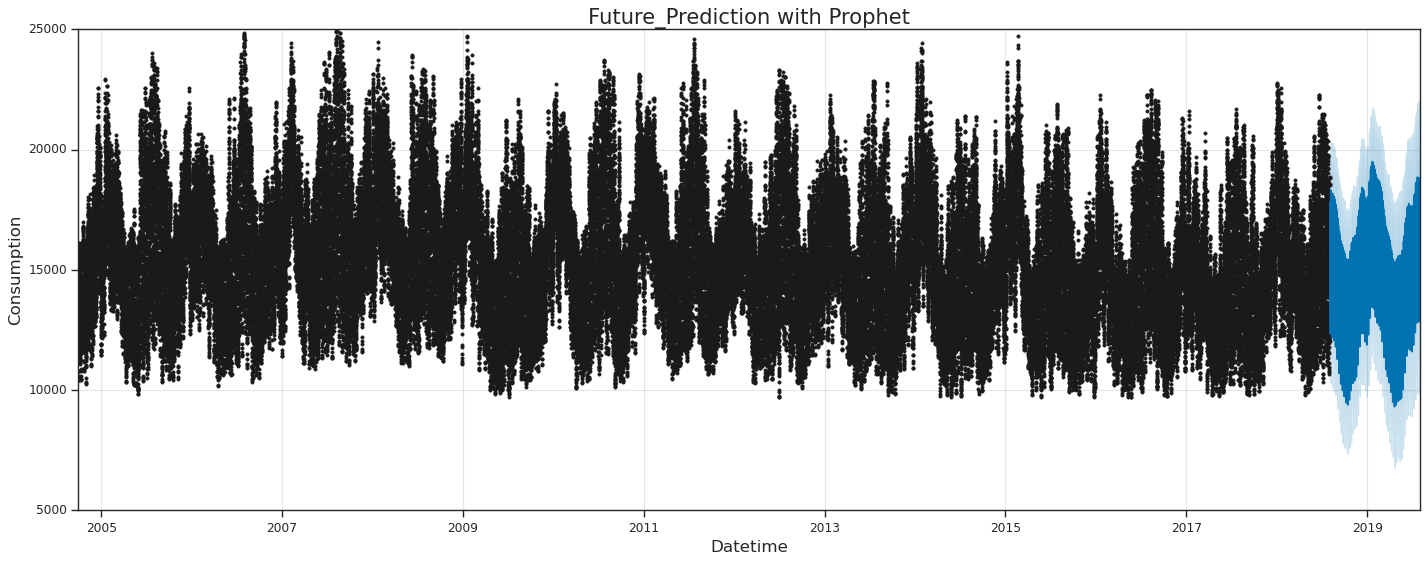

In [43]:
f,ax=plt.subplots(figsize=(18,7))
model_f.plot(Future_Prediction,ax=ax)
ax.set_title('Future_Prediction with Prophet',fontsize=19)
ax.set_xlabel('Datetime',fontsize=15)
ax.set_ylabel('Consumption',fontsize=15)

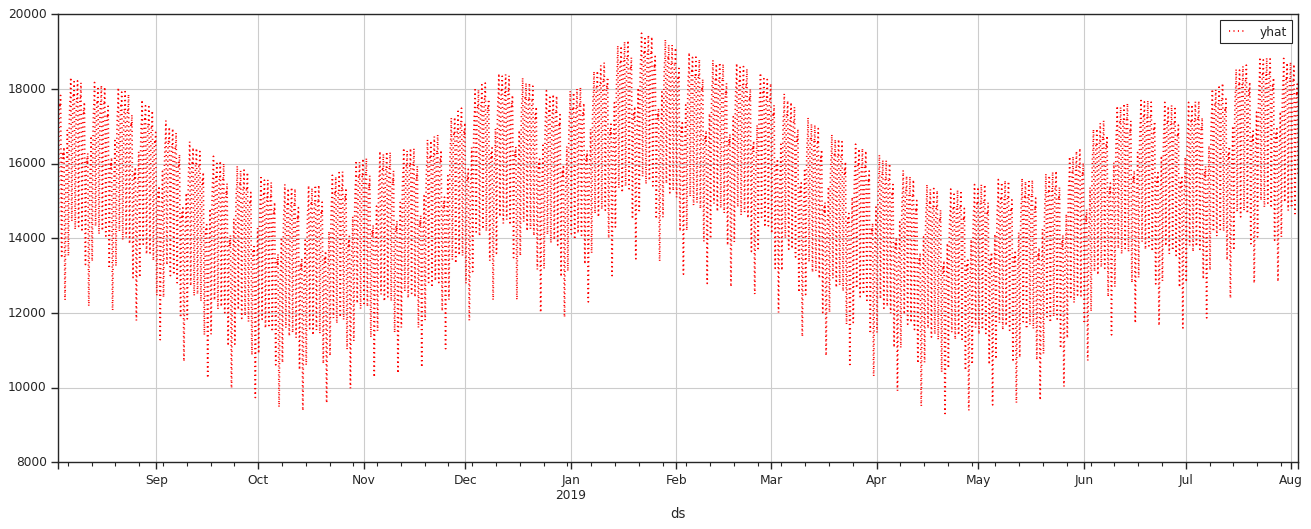

In [44]:
f,ax=plt.subplots(figsize=(20,7))
Future_Prediction.loc[:,['ds','yhat']].plot(x='ds',y='yhat',style=':',color='red',ax=ax)
ax.grid(True)

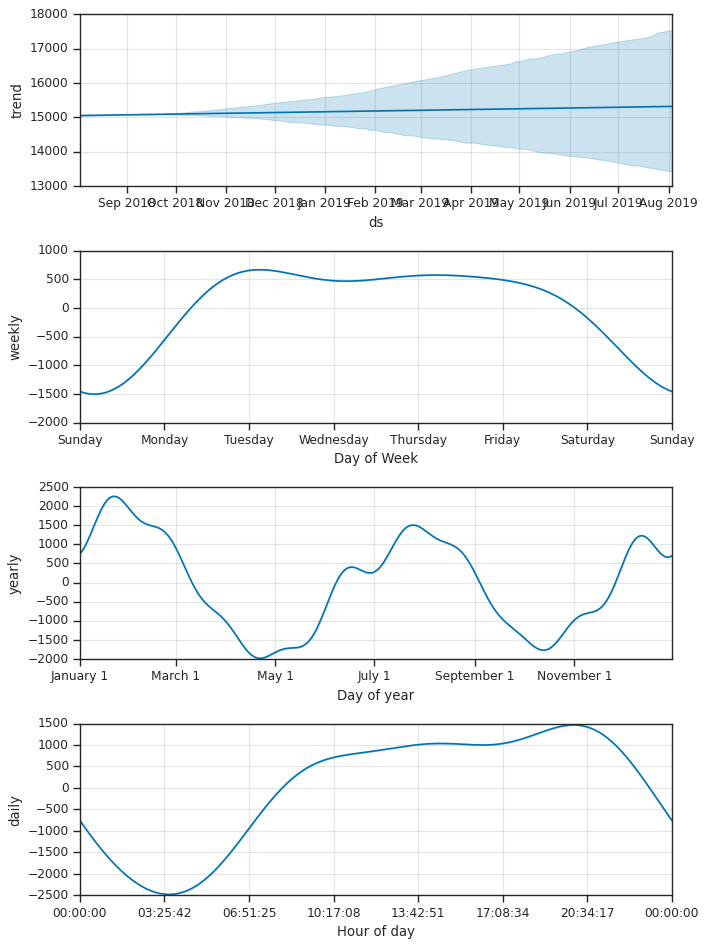

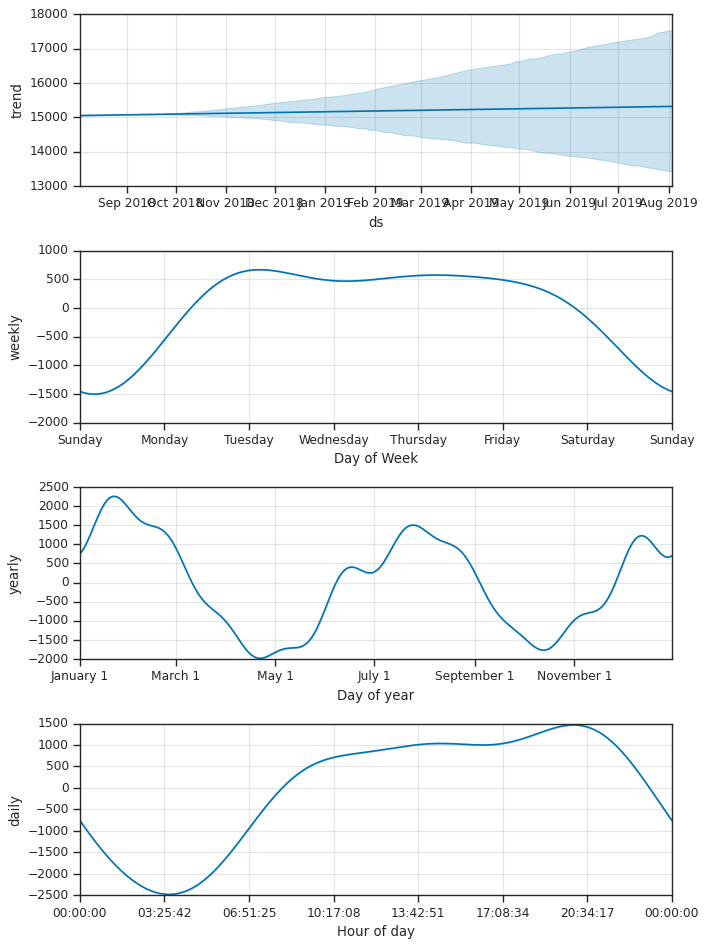

In [46]:
model_f.plot_components(Future_Prediction,plot_cap=False)